# Reception d'emails


In [1]:
from src.okofen import Okofen, OkofenConfig
from src.plot import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

"""
Create your own config with your Gmail application credentials and the filter with your Okfen ID name
{
    
    "data_dir":"~/dev/data/okfen",
    "gmail_acount":"your.email@gmail.com",
    "gmail_passwd":"[Gmail application pass]",
    "email_subject_key_serach":"P0060C6_42F21A",
    "gmail_box":"INBOX"    
}

"""


f = open("config_okofen.json")
config_data = json.load(f)
f.close()

config = OkofenConfig(
    data_dir=config_data["data_dir"],
    gmail_acount=config_data["gmail_acount"],
    gmail_passwd=config_data["gmail_passwd"],
    email_subject_key_serach=config_data["email_subject_key_serach"],
    gmail_box=config_data["gmail_box"],
)

okofen = Okofen(config)
okofen.Update_db_from_gmail()
okofen.data

Connection Object : <imaplib.IMAP4_SSL object at 0x7f121d5f3010>


/home/velkouby/dev/OkofenObserver/src/okofen.py:153: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['Datum ', 'Zeit ', 'AT [°C]', 'ATakt [°C]', 'HK1 VL Ist[°C]',
       'HK1 VL Soll[°C]', 'HK1 RT Ist[°C]', 'HK1 RT Soll[°C]', 'HK1 Fernb[°C]',
       'PE1 KT[°C]', 'PE1 KT_SOLL[°C]', 'PE1 UW Freigabe[°C]',
       'PE1 FRT Ist[°C]', 'PE1 FRT Soll[°C]', 'PE1 FRT End[°C]',
       'PE1 Einschublaufzeit[zs]', 'PE1 Pausenzeit[zs]',
       'PE1 Unterdruck Ist[EH]', 'PE1 Unterdruck Soll[EH]',
       'PE1 Res1 Temp.[°C]', 'WW1 EinT Ist[°C]', 'WW1 AusT Ist[°C]',
       'WW1 Soll[°C]', 'PE1 Res2 Temp.[°C]'],
      dtype='object')]

  self.data.to_hdf(db_filename,key='data')


,T°C Extérieure,ATakt [°C],T°C Chaudière,T°C Chaudière Consigne,OKO 1 - Contact Brûleur (On/Off),T°C Départ,T°C Départ Consigne,T°C Ambiante,T°C Ambiante Consigne,Circulateur Chauffage (On/Off),...,T°C ECS,T°C ECS (arret),T°C ECS Consigne,Circulateur ECS,Status ESC,PE1 Modulation[%],T°C Flamme,T°C Flamme Consigne,Niveau Sillo kg,Niveau tremis kg
datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-11 00:03:04,12.6,12.3,51.4,8.0,0.0,21.7,8.0,21.6,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,60.6,8.0,5573.0,48.0
2021-10-11 00:04:04,12.6,12.4,51.4,8.0,0.0,21.7,8.0,21.6,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,60.4,8.0,5573.0,48.0
2021-10-11 00:05:04,12.6,12.3,51.4,8.0,0.0,21.6,8.0,21.6,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,60.4,8.0,5573.0,48.0
2021-10-11 00:06:04,12.6,12.4,51.4,8.0,0.0,21.6,8.0,21.6,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,60.3,8.0,5573.0,48.0
2021-10-11 00:07:04,12.6,12.3,51.3,8.0,0.0,21.6,8.0,21.6,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,60.1,8.0,5573.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13 23:56:18,23.6,23.1,61.2,8.0,0.0,23.9,8.0,26.8,8.0,0.0,...,38.5,38.5,35.4,0.0,8200.0,0.0,63.2,8.0,1656.0,42.0
2023-06-13 23:57:18,23.6,23.1,61.2,8.0,0.0,23.9,8.0,26.8,8.0,0.0,...,38.5,38.5,35.4,0.0,8200.0,0.0,63.2,8.0,1656.0,42.0
2023-06-13 23:58:18,23.5,23.0,61.1,8.0,0.0,23.9,8.0,26.8,8.0,0.0,...,38.5,38.5,35.4,0.0,8200.0,0.0,63.2,8.0,1656.0,42.0


## Creation de la table journalière

Les journées doivent etre considéré de 3h à 3h

Index journalier:
* temperature ambiante moyenne de jour: 8h/20h
* temperature ambiante moyenne de nuit: 2h/5h
* temperature exterieur moyenne de jour: 8h/20h
* temperature exterieur moyenne de nuit: 2h/5h
* consomation journalière Kg
* ESC Temperature min
* ESC Temerature max
* ESC temperature moyenne
* Temps chaudière allumée


# Dashboard of day

In [2]:
import matplotlib.pyplot as plt
def plot_graph_repport(d_data):
    fig, axs = plt.subplots(8, 1, figsize=(40, 40), dpi=200)
    plot_data(axs[0], d_data, ["T°C Extérieure",'T°C Ambiante','T°C Ambiante Consigne'],'°C')
    plot_data(axs[1], d_data, ['T°C Chaudière','T°C Chaudière Consigne','T°C Départ','T°C Départ Consigne'],'°C')
    plot_data(axs[2], d_data, ['Circulateur Chauffage (On/Off)'],'On/Off')
    plot_data(axs[3], d_data, ['Status Chauff.'],'On/Off')
    plot_data(axs[4], d_data, ['T°C ECS','T°C ECS Consigne','T°C ECS (arret)'],'°C')
    plot_data(axs[5], d_data, ['Circulateur ECS'],'On/Off')
    plot_data(axs[6], d_data, ['PE1 Modulation[%]'],'%')
    plot_data(axs[7], d_data, ['T°C Flamme','T°C Flamme Consigne'],'°C')



17433 data from 15 last days since 2023-05-28


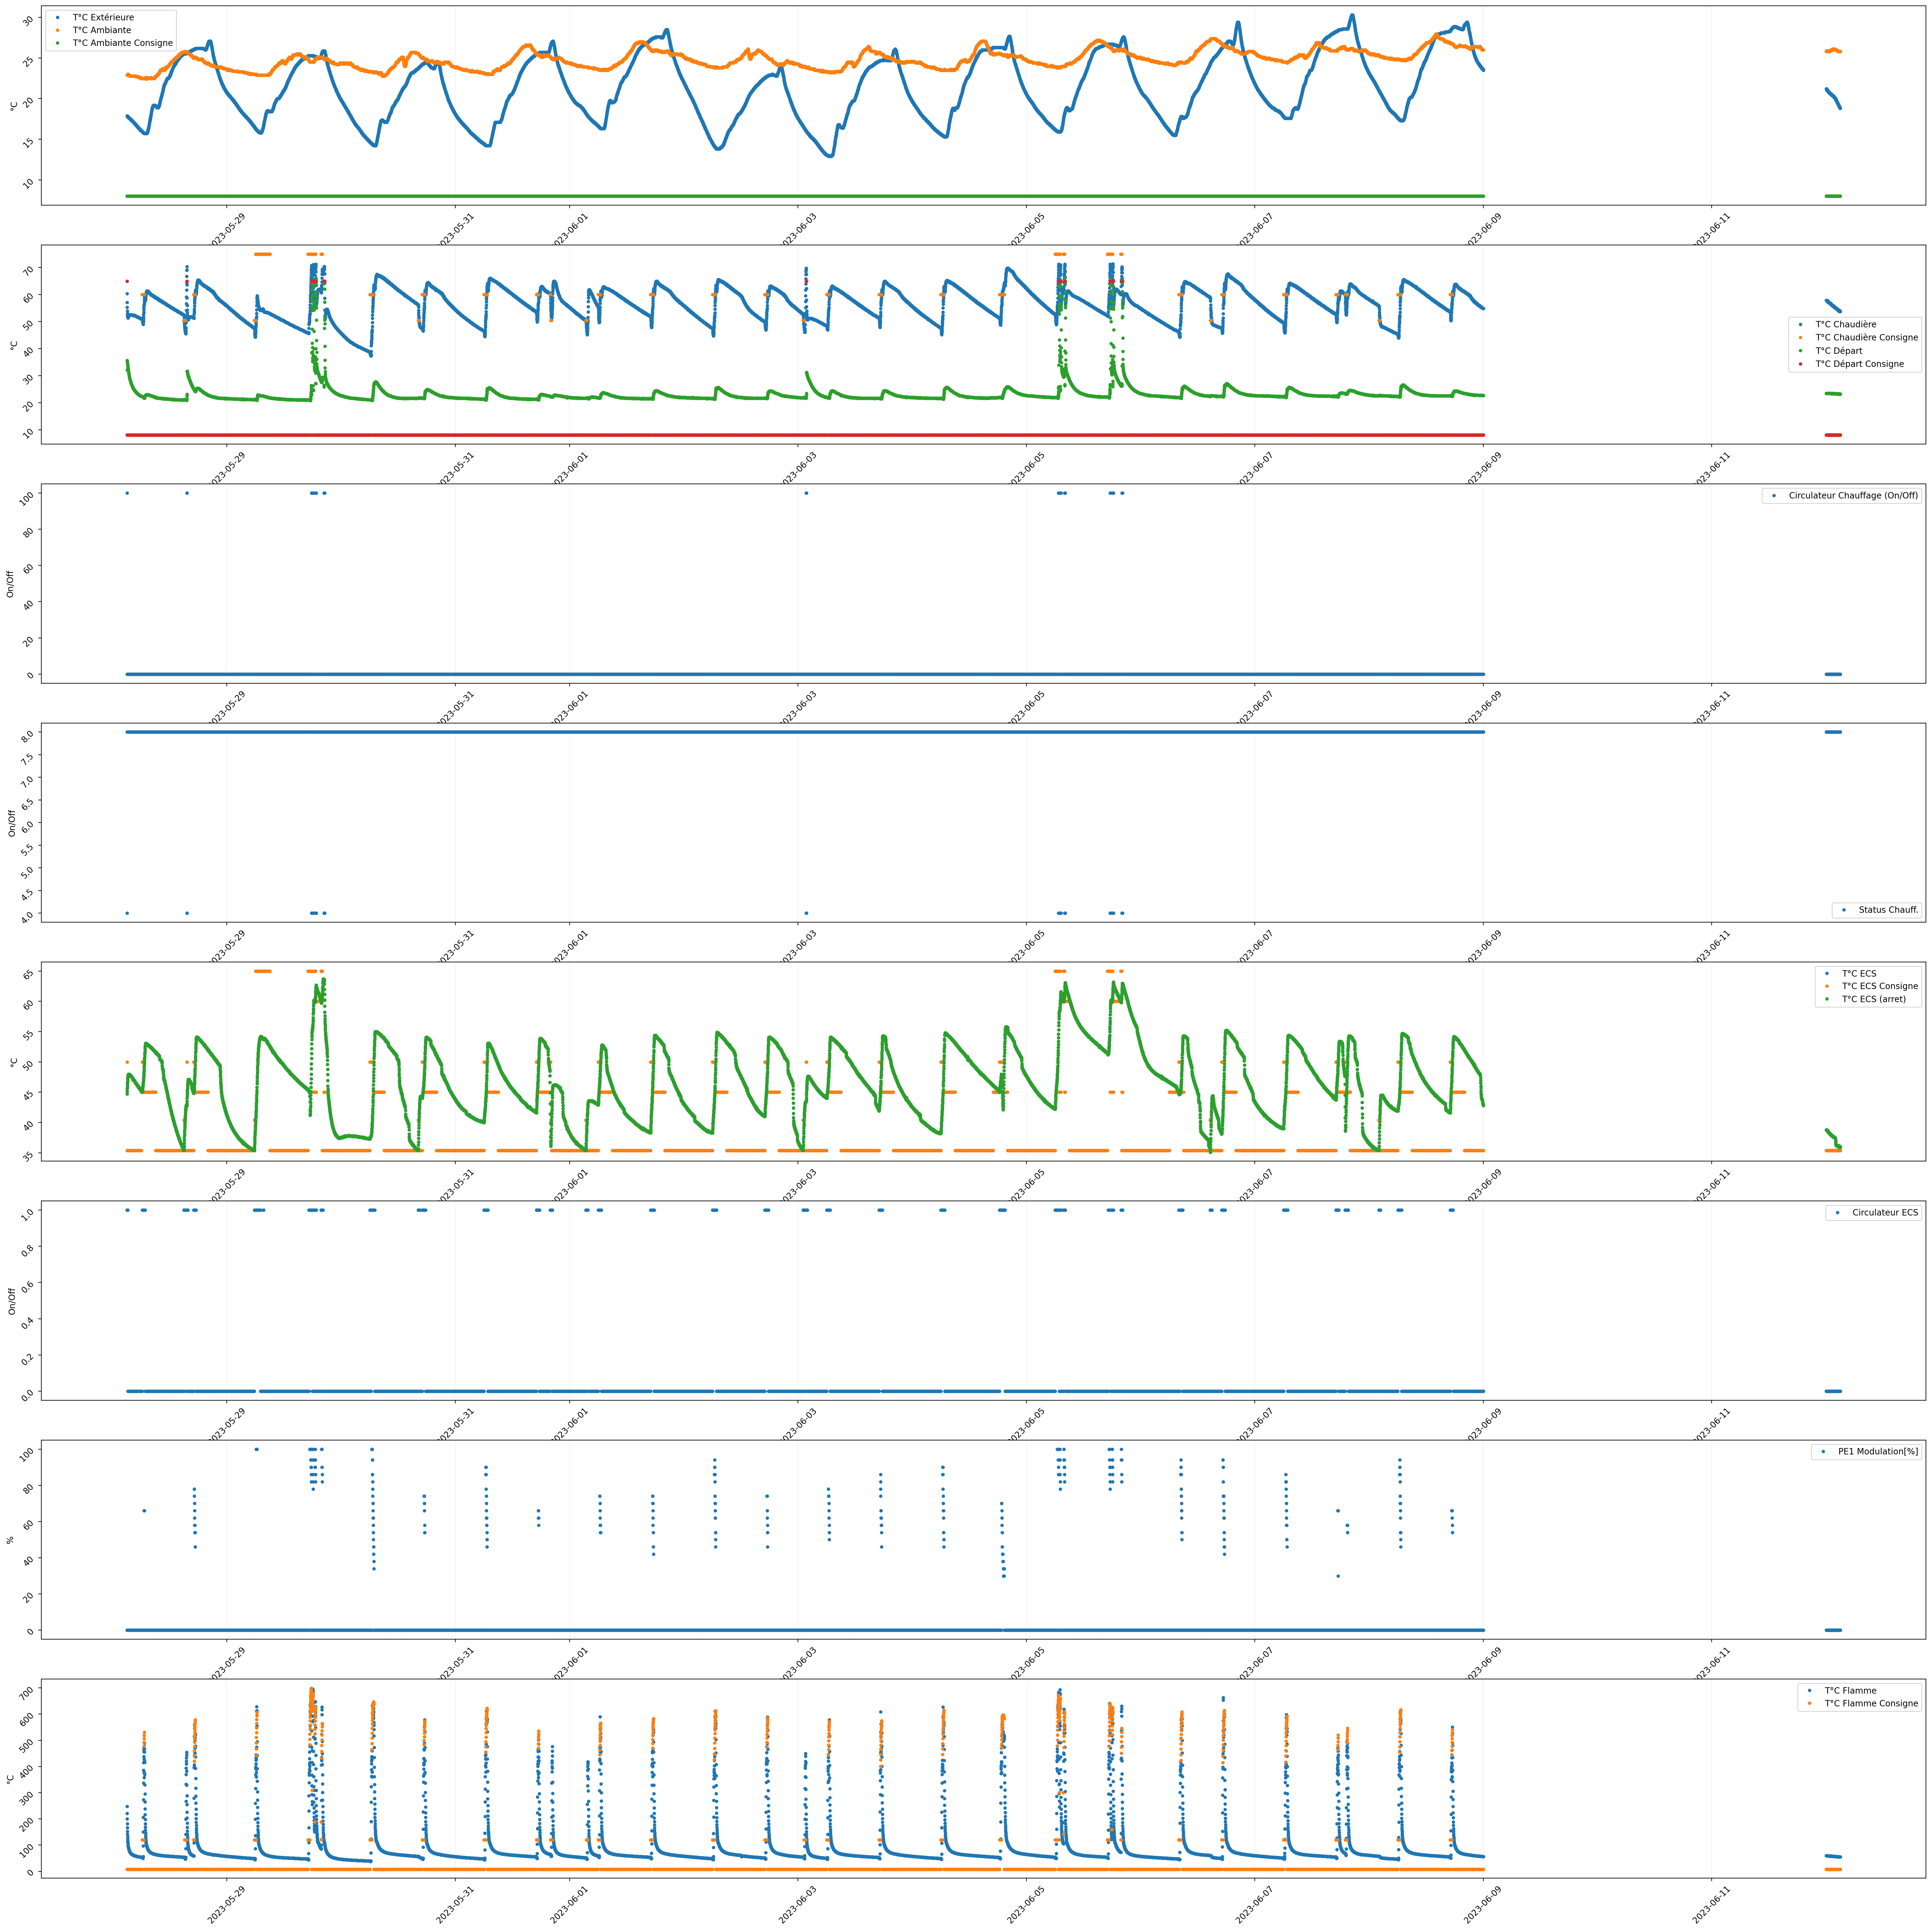

In [3]:
print_last_day_data = True

if print_last_day_data:
    nb_last_days = 15
    day = okofen.days[-nb_last_days - 1]
    d_data = okofen.select_data(day, nb_days=nb_last_days)
    print(f"{d_data.shape[0]} data from {nb_last_days} last days since {day}")
else:
    d_data = okofen.select_data_by_days("01/04/2023", "15/04/2023")

plot_graph_repport(d_data)

plt.savefig("figure.jpg")

In [4]:
daydata = {
    "diff_consigne_TempDepart": [],
    "T Amb matin": [],
    "T Amb jour": [],
    "T Amb nuit": [],
    "T Ext jour": [],
    "T Ext nuit": [],
    "ESC T min": [],
    "ESC T max": [],
    "ESC T mean": [],
    "pellet Kg": [],
    "time on": [],
}
dates = []
for day in okofen.days:
    d_data = okofen.select_data(day)
    # print(f'Start analysis for {day}: {d_data.shape[0]} samples')
    if d_data.shape[0] == 0:
        continue
    diff = compute_tempDepart_min_dist_from_target(d_data)
    if diff is not None:
        daydata["diff_consigne_TempDepart"].append(diff)
    else:
        daydata["diff_consigne_TempDepart"].append(np.nan)

    daydata["T Amb matin"].append(
        compute_average(
            d_data, "T°C Ambiante", start_hour="07:30:00", end_hour="07:45:00"
        )
    )
    daydata["T Amb jour"].append(
        compute_average(
            d_data, "T°C Ambiante", start_hour="08:00:00", end_hour="20:00:00"
        )
    )
    daydata["T Amb nuit"].append(
        compute_average(
            d_data, "T°C Ambiante", start_hour="03:00:00", end_hour="05:30:00"
        )
    )
    daydata["T Ext jour"].append(
        compute_average(
            d_data, "T°C Extérieure", start_hour="12:00:00", end_hour="16:00:00"
        )
    )
    daydata["T Ext nuit"].append(
        compute_average(
            d_data, "T°C Extérieure", start_hour="03:00:00", end_hour="05:30:00"
        )
    )
    esc_values = compute_ESC_indexes(d_data)
    daydata["ESC T min"].append(esc_values["ESC T min"])
    daydata["ESC T max"].append(esc_values["ESC T max"])
    daydata["ESC T mean"].append(esc_values["ESC T mean"])
    daydata["pellet Kg"].append(consommation_pellet(d_data))
    daydata["time on"].append(fire_on_time(d_data))

    dates.append(day)

daydata = pd.DataFrame(daydata, index=dates)
daydata

,diff_consigne_TempDepart,T Amb matin,T Amb jour,T Amb nuit,T Ext jour,T Ext nuit,ESC T min,ESC T max,ESC T mean,pellet Kg,time on
2021-10-11,-6.2,20.9,21.4,20.6,14.3,10.0,NaN,NaN,NaN,14.0,4.966667
2021-10-12,-4.2,20.8,21.4,20.4,13.3,10.2,NaN,NaN,NaN,15.0,4.783333
2021-10-13,-1.7,20.9,21.4,20.7,13.4,10.8,NaN,NaN,NaN,22.0,5.733333
2021-10-14,-2.6,21.5,22.0,20.6,11.9,7.7,NaN,NaN,NaN,18.0,4.300000
2021-10-15,-1.2,21.4,21.7,20.7,11.2,8.6,NaN,NaN,NaN,53.0,5.183333
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,NaN,24.2,24.4,24.3,21.1,16.4,35.1,55.2,46.087135,3.0,1.216667
2023-06-07,NaN,24.7,24.9,24.7,23.7,18.2,35.4,54.4,45.884492,3.0,1.366667
2023-06-08,NaN,24.7,24.8,24.8,25.0,18.0,41.6,54.7,47.644251,3.0,1.083333
2023-06-12,-1.9,25.4,24.6,25.4,24.4,17.6,0.0,62.9,47.894044,3.0,3.066667


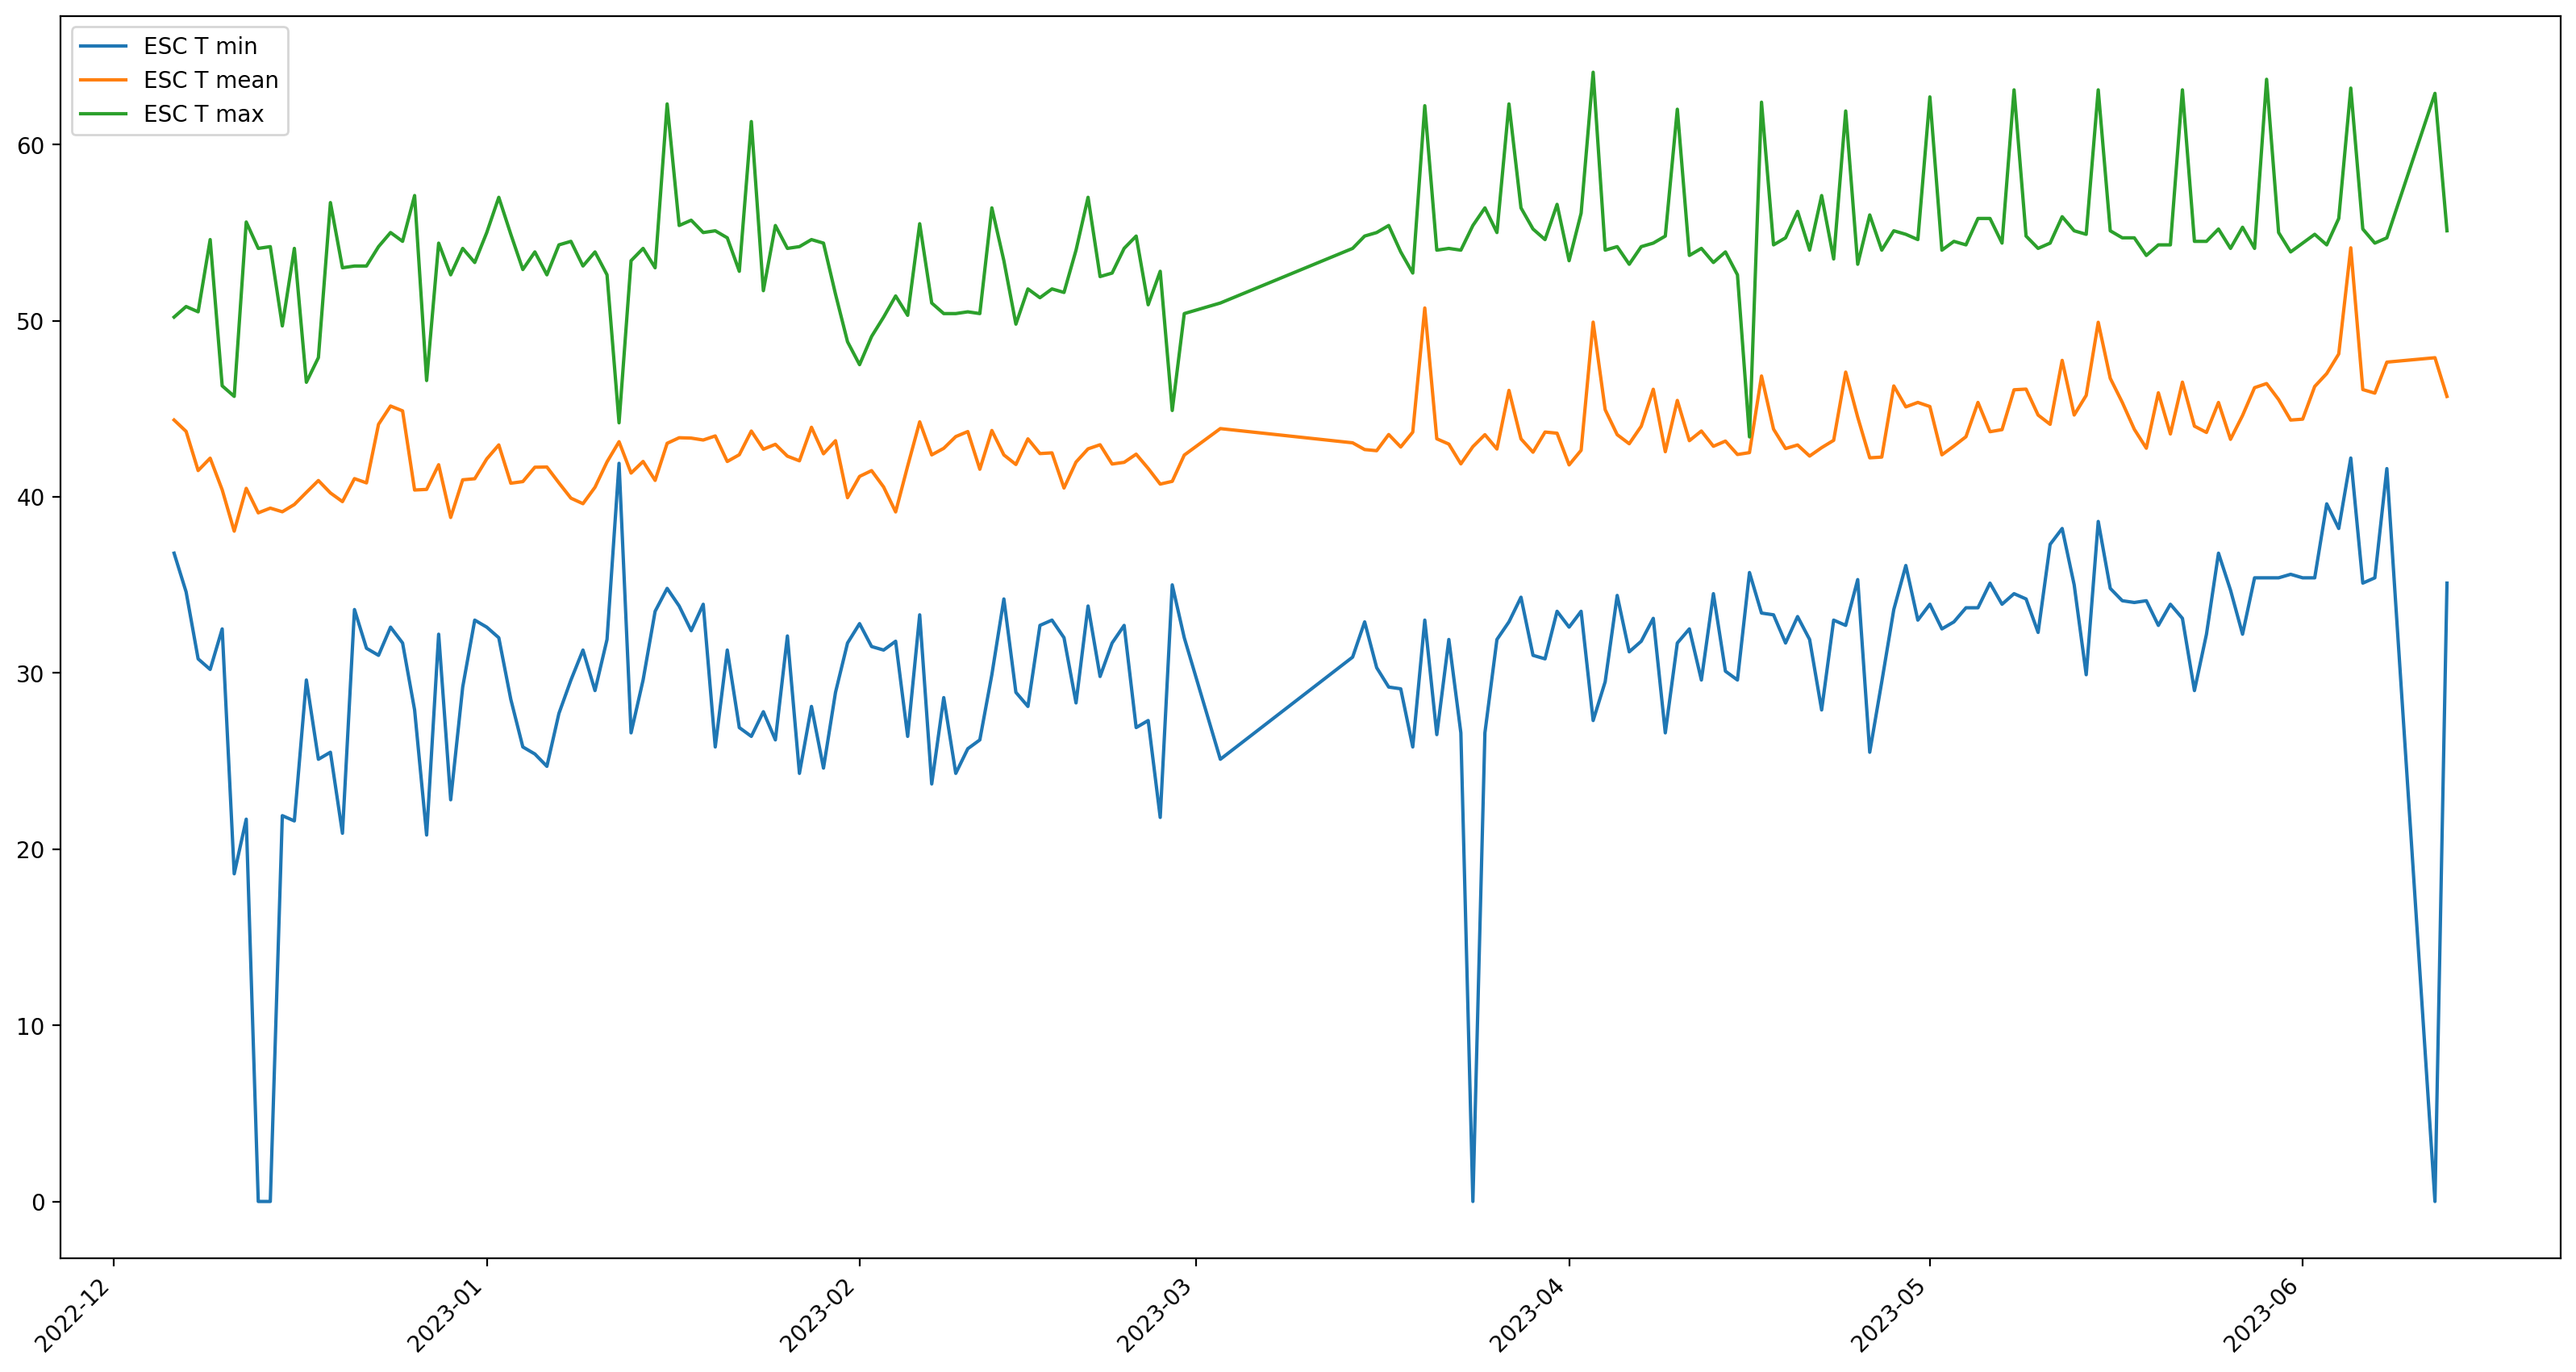

In [5]:
fig = plt.figure(figsize=(20, 10), dpi=200)
plt.plot(daydata[["ESC T min", "ESC T mean", "ESC T max"]])
plt.xticks(rotation=45, ha="right")
plt.legend(["ESC T min", "ESC T mean", "ESC T max"])

Text(0, 0.5, "Durée d'allumage - (h)")

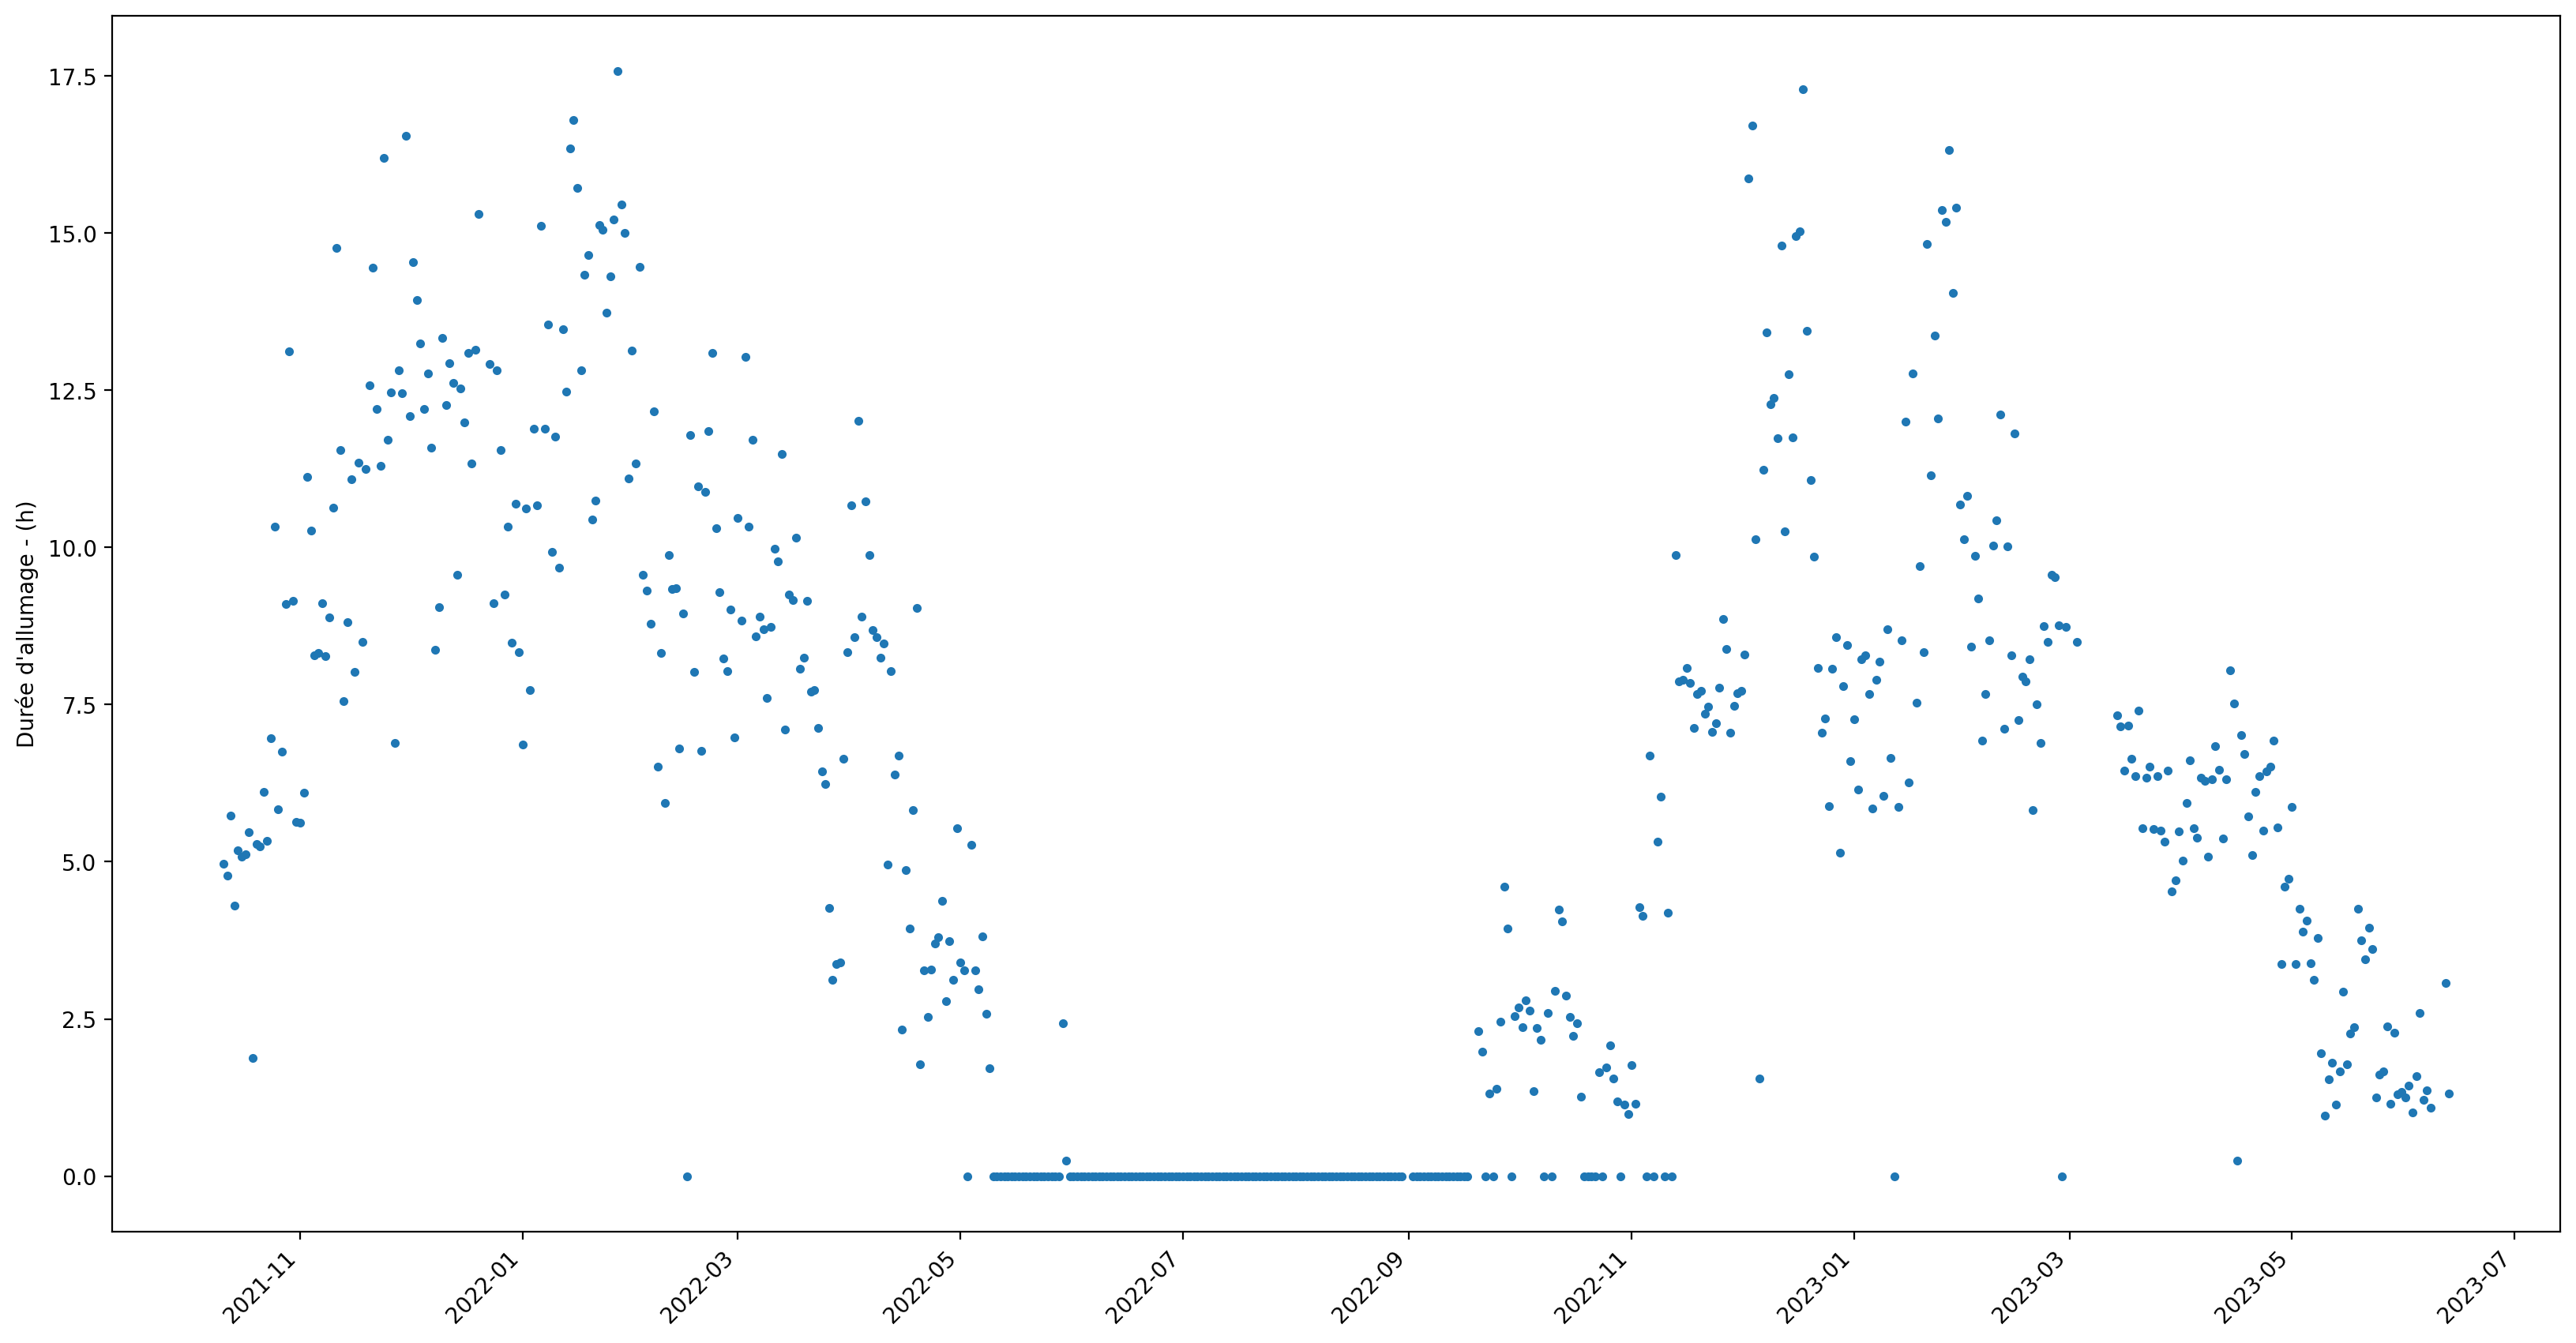

In [6]:
fig = plt.figure(figsize=(20, 10), dpi=200)
plt.plot(daydata["time on"], ".")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Durée d'allumage - (h)")

(0.0, 130.0)

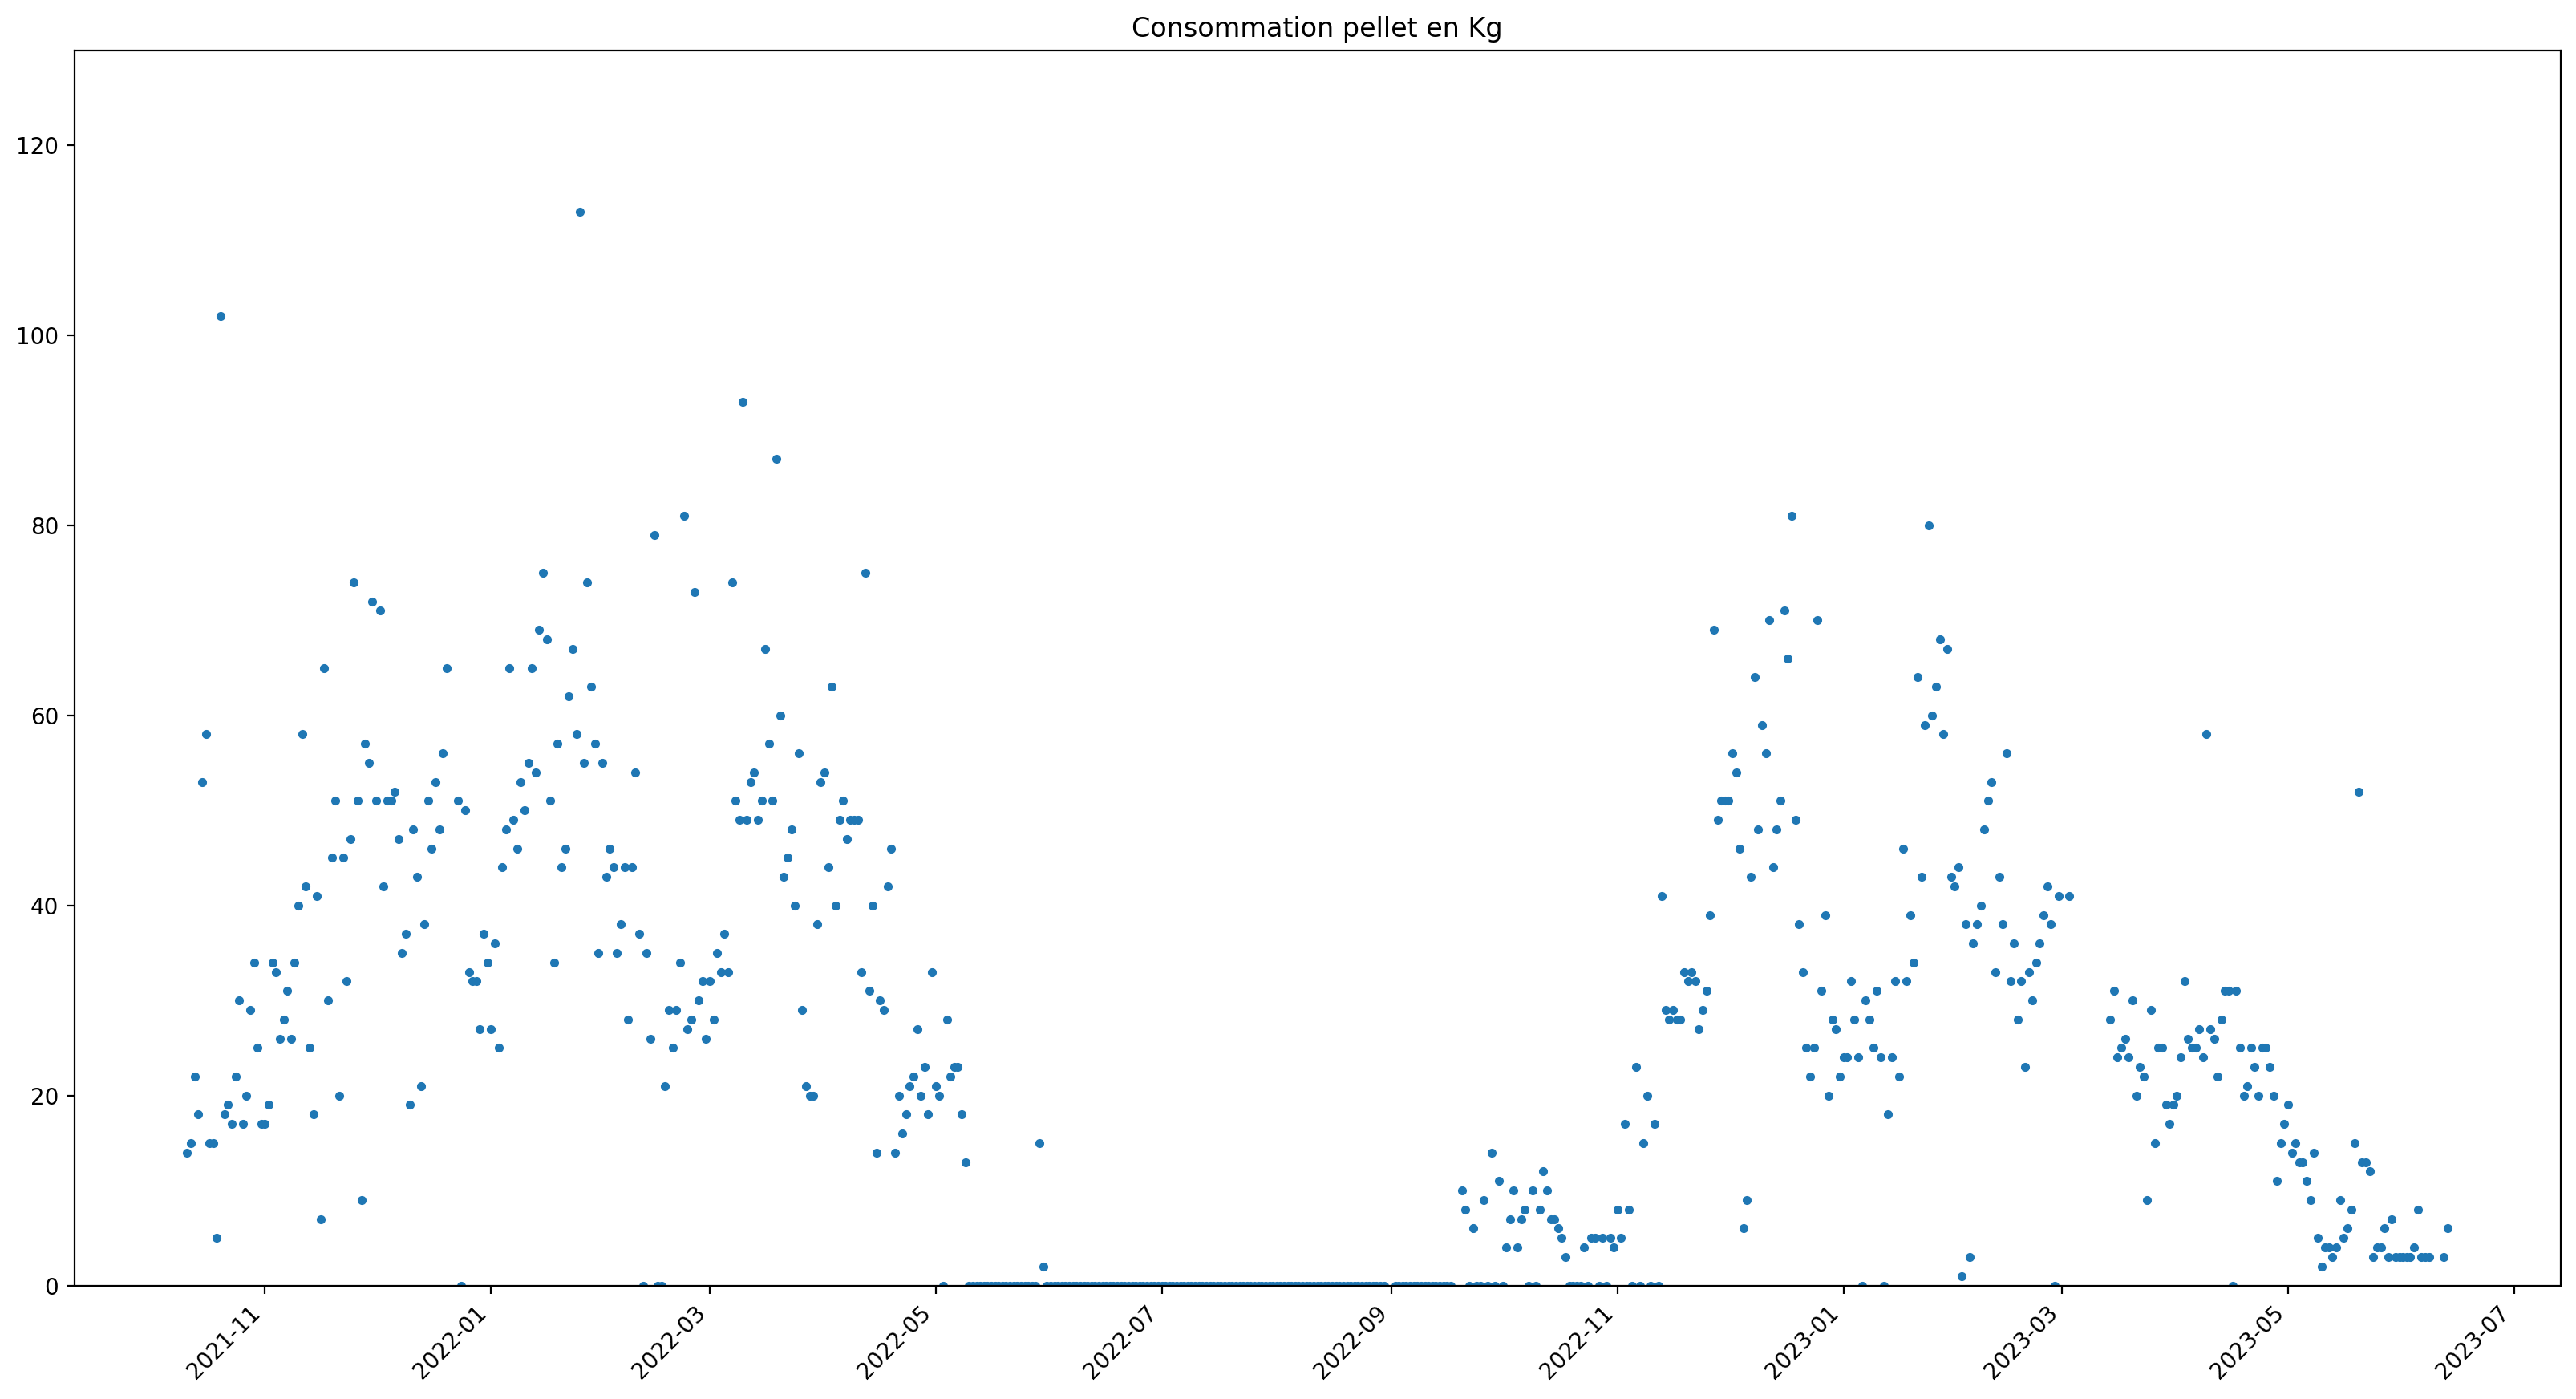

In [7]:
fig = plt.figure(figsize=(20, 10), dpi=200)
plt.plot(daydata["pellet Kg"], ".")
plt.xticks(rotation=45, ha="right")
plt.title("Consommation pellet en Kg")
plt.ylim([0, 130])

Text(0, 0.5, 'Kg/h')

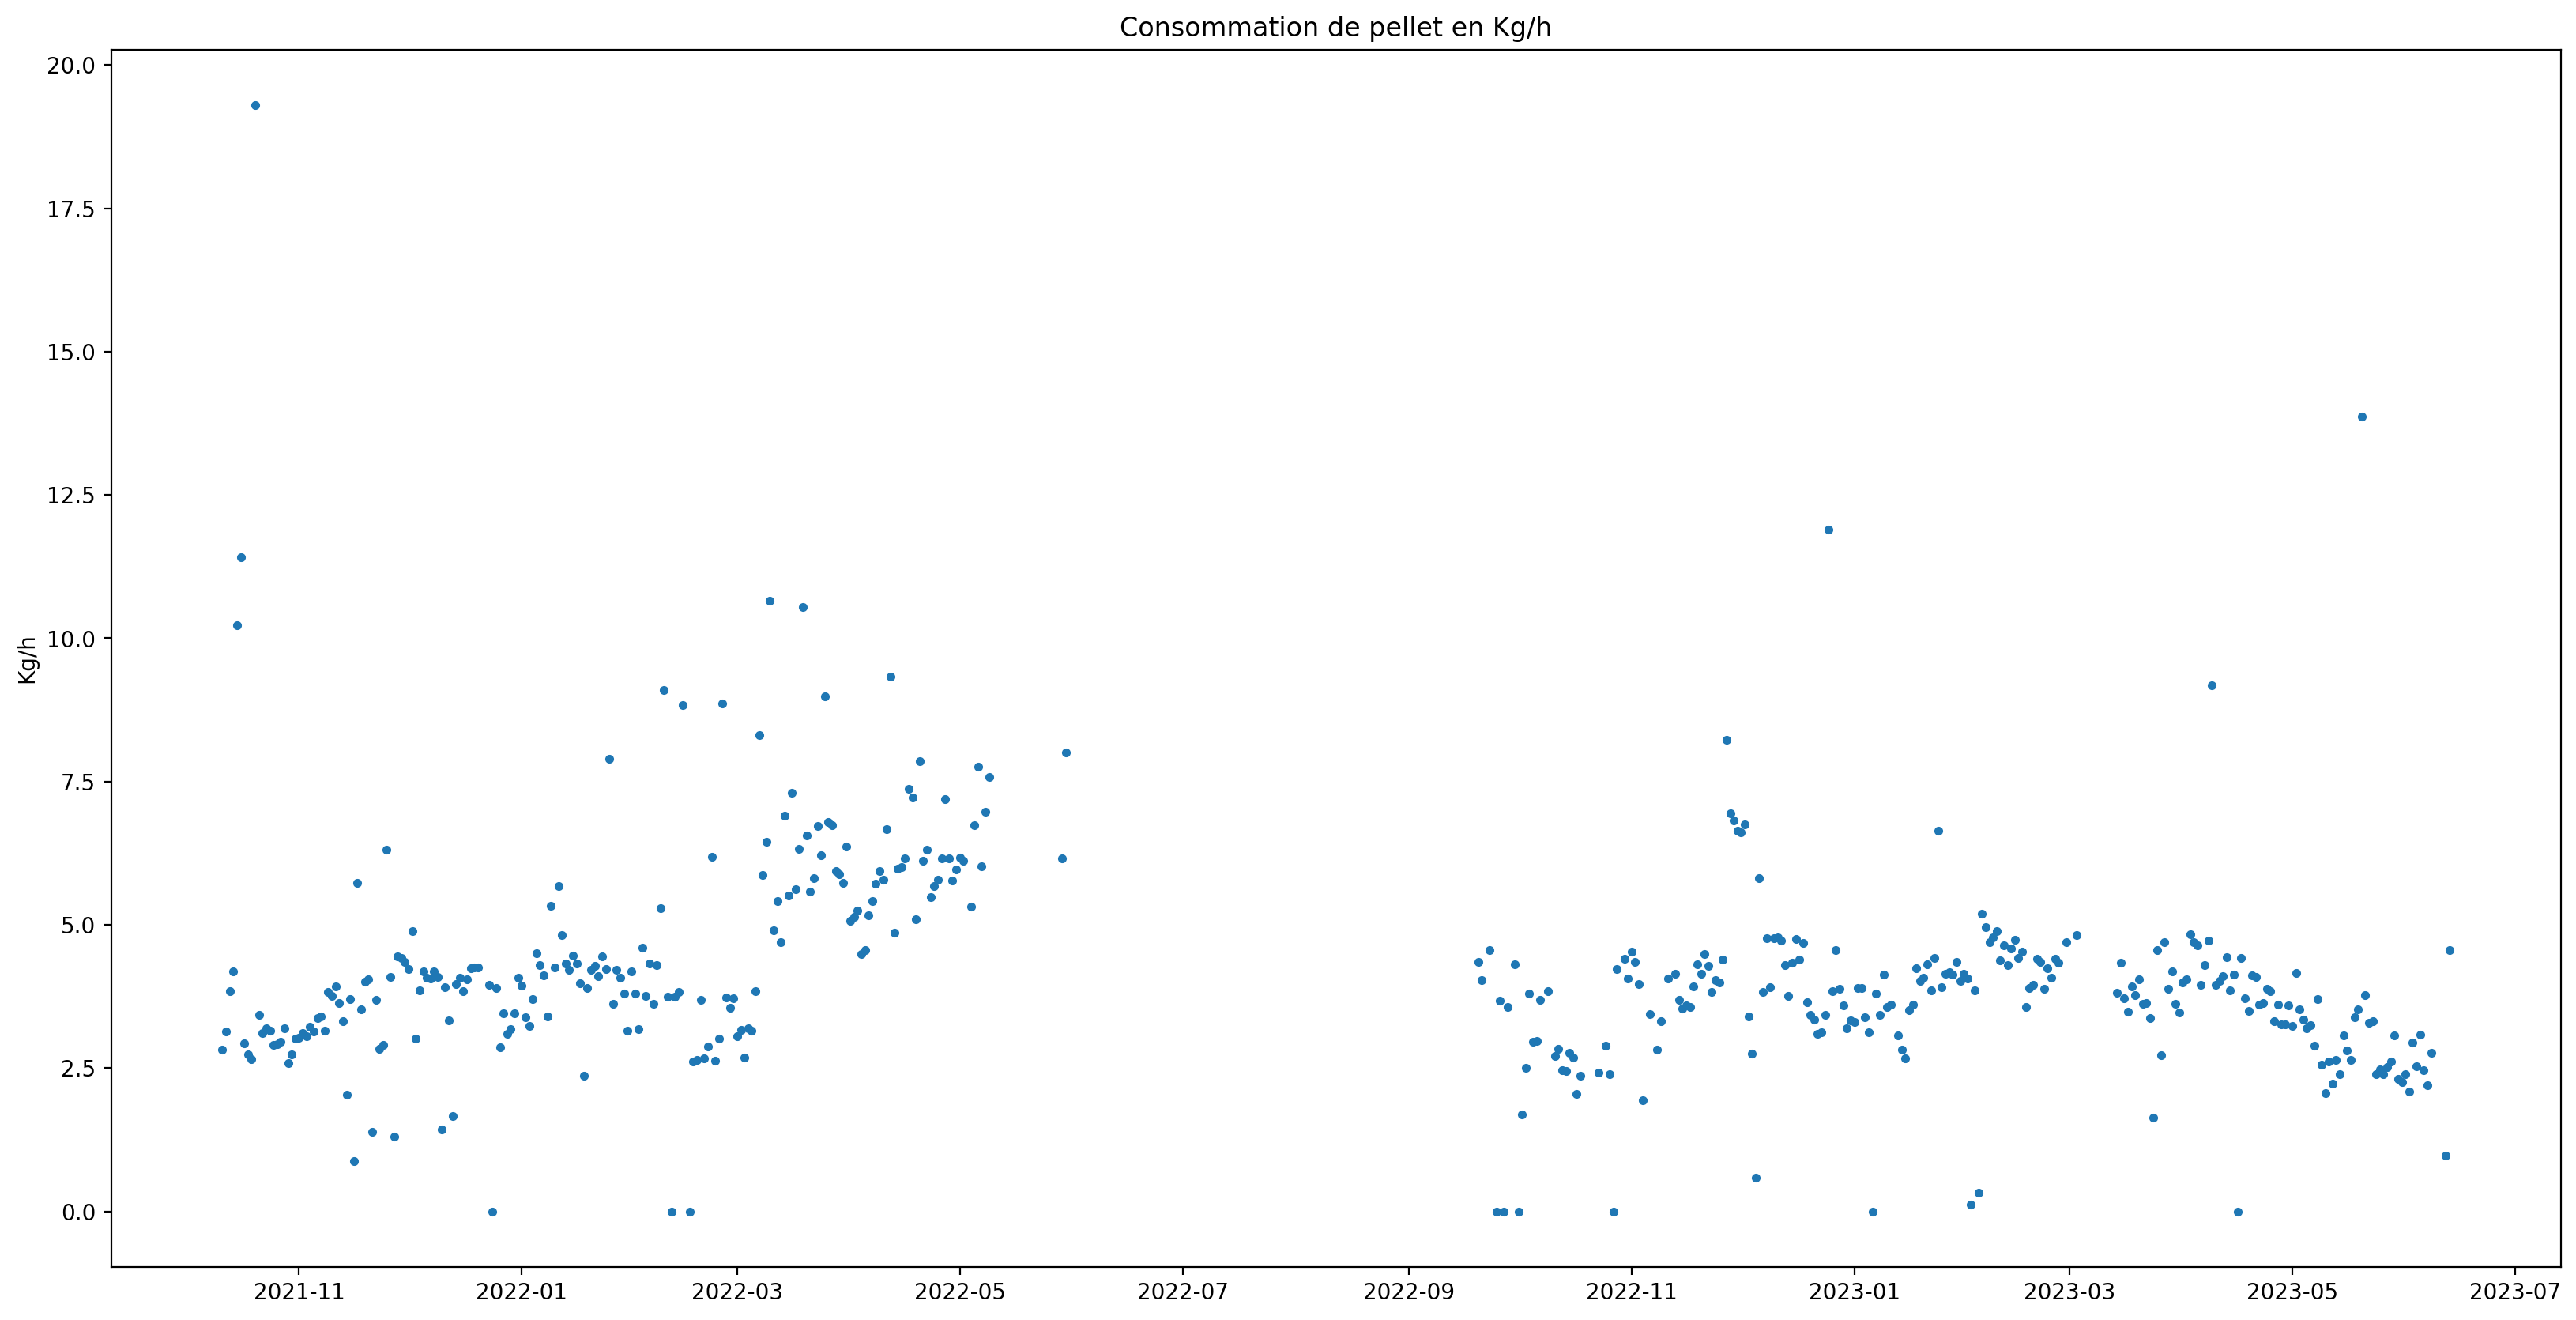

In [8]:
fig = plt.figure(figsize=(20, 10), dpi=200)
plt.plot(daydata["pellet Kg"] / daydata["time on"], ".")
plt.title("Consommation de pellet en Kg/h")
plt.ylabel("Kg/h")